<h4>Explore how weather affects GDP in Industrial based economies</h4>

In [1]:
#import dependencies
import requests 
import json
from pprint import pprint
import os
import pandas as pd
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Read in Data
file_path = os.path.join("Resources", "Merge_data_2005-2015.csv")
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,ISO3,Country,Year,Temp_Farenheit,Rainfall_mm,GDP
0,0,AFG,Afghanistan,2005,56.087945,29.609967,6.209138e+09
1,1,AFG,Afghanistan,2006,57.501470,27.120458,6.971286e+09
2,2,AFG,Afghanistan,2007,56.320054,25.329681,9.747880e+09
3,3,AFG,Afghanistan,2008,56.755070,21.505365,1.010923e+10
4,4,AFG,Afghanistan,2009,56.807912,31.106477,1.243909e+10


In [3]:
# Create list of Countries of interest
industrial_ISO3 = ["AGO", "KWT", "MNP", "TLS", "BRN", "GNQ", "AZE", "LBY", "IRQ"]

Cov is -0.562335610156518


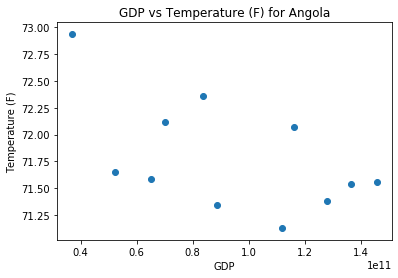

Cov is -0.2449268119843173


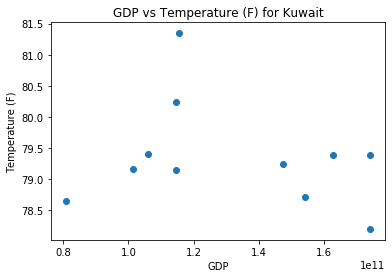

Cov is 0.19400384932056927


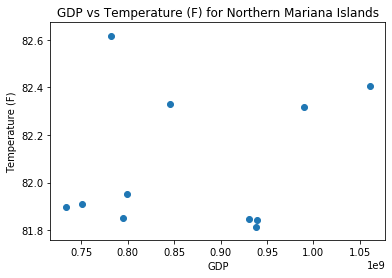

Cov is 0.07995717067505267


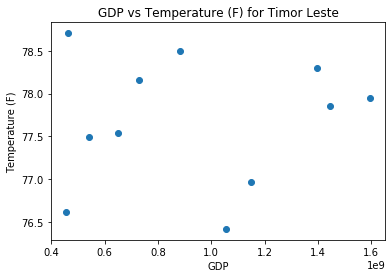

Cov is 0.021304776136088593


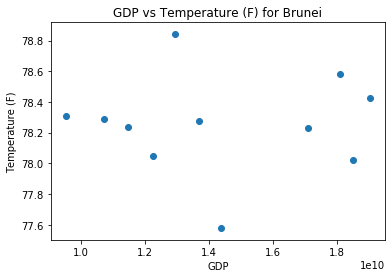

Cov is -0.6209734566206095


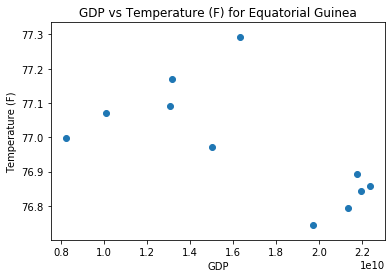

Cov is 0.2292267727895188


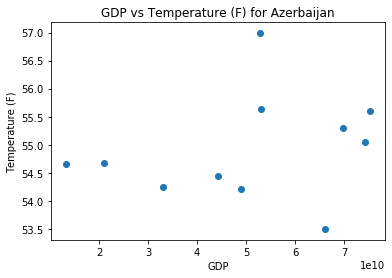

Cov is 0.3494430534479662


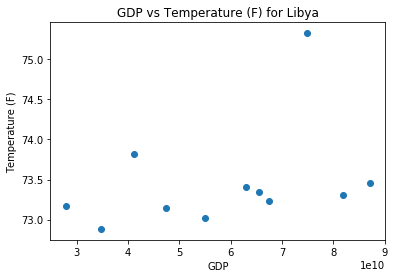

Cov is 0.11180683002609876


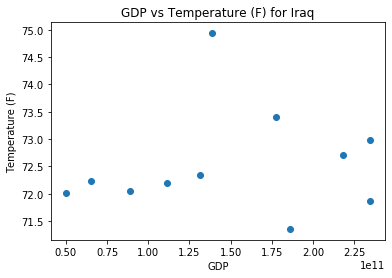

In [26]:
# Create a GDP vs Temperature plot for all COuntries of Interest

countries = []
correlations = []
for code in industrial_ISO3:
    country_df = df[df["ISO3"] == code]
    country_name = country_df.iloc[0]["Country"]
    gdp_series = country_df["GDP"]
    temp_series = country_df["Temp_Farenheit"]
    var_df = country_df.corr()
    var_df.head()
    var = var_df.iloc[4]["Temp_Farenheit"]
    plt.figure()
    plt.scatter(gdp_series, temp_series)
    plt.title("GDP vs Temperature (F) for " + str(country_name))
    plt.xlabel("GDP")
    plt.ylabel("Temperature (F)")
    print(f"Cov is {var}")
    plt.savefig("output_data/Q4/gdpVtemp_" + str(country_name + ".png"))
    plt.show()
    countries.append(str(country_name))
    correlations.append(var)
    

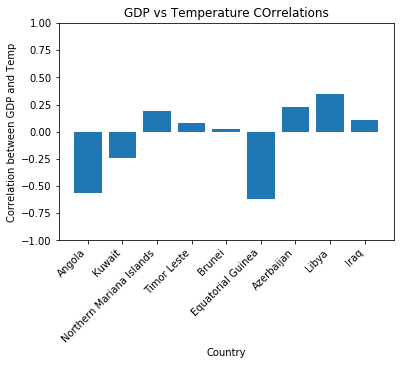

In [27]:
x_pos = [i for i in range(len(countries))]

plt.bar(x_pos, correlations)
plt.xlabel("Country")
plt.ylabel("Correlation between GDP and Temp")
plt.title("GDP vs Temperature COrrelations")
plt.ylim(-1,1)
plt.xticks(x_pos, countries, rotation = 45, ha = "right")
plt.savefig("output_data/Q4/correlation_gdpVtemp.png")
plt.show()